In [87]:
import numpy as np
import pandas as pd

In [88]:
df = pd.read_csv("apple_type_data.csv",sep=";")

In [89]:
df

,Text,Apple_type
0,The apple tree (Malus domestica) is a deciduou...,fruit
1,"Apple trees are large if grown from seed, but ...",fruit
2,"Blossoms, fruits, and leaves of the apple tree...",fruit
3,"When cultivated, the size, shape and branch de...",Company
4,"It was incorporated as Apple Computer, Inc. on...",Company
5,Apple is the world's largest information techn...,Company
6,and the world's second-largest mobile phone ma...,Company
7,"In November 2014, in addition to being the lar...",Company
8,To put this into perspective this revenue gene...,Company
9,The company enjoys a high level of brand loyal...,Company


In [90]:
type(df)

pandas.core.frame.DataFrame

In [91]:
df.columns

Index(['Text', 'Apple_type'], dtype='object')

### Affichage

In [92]:
# ou df["Text"]
df.Text

0    The apple tree (Malus domestica) is a deciduou...
1    Apple trees are large if grown from seed, but ...
2    Blossoms, fruits, and leaves of the apple tree...
3    When cultivated, the size, shape and branch de...
4    It was incorporated as Apple Computer, Inc. on...
5    Apple is the world's largest information techn...
6    and the world's second-largest mobile phone ma...
7    In November 2014, in addition to being the lar...
8    To put this into perspective this revenue gene...
9    The company enjoys a high level of brand loyal...
Name: Text, dtype: object

In [93]:
type(df.Text)

pandas.core.series.Series

In [94]:
type(df.Text.values)

numpy.ndarray

In [95]:
text = df.Text.values
text

array(['The apple tree (Malus domestica) is a deciduous tree in the rose family best known for its sweet, pomaceous fruit, the apple. It is cultivated worldwide as a fruit tree, and is the most widely grown species in the genus Malus. The tree originated in Central Asia, where its wild ancestor, Malus sieversii, is still found today. Apples have been grown for thousands of years in Asia and Europe, and were brought to North America by European colonists. Apples have religious and mythological significance in many cultures, including Norse, Greek and European Christian traditions.',
       "Apple trees are large if grown from seed, but small if grafted onto roots (rootstock). There are more than 7,500 known cultivars of apples, resulting in a range of desired characteristics. Different cultivars are bred for various tastes and uses, including cooking, eating raw and cider production. Apples are generally propagated by grafting, although wild apples grow readily from seed. Trees and frui

In [96]:
df["category"] = df.Apple_type.factorize()[0]

In [97]:
# df[["Text","Apple_type"]]
df[["category","Apple_type"]]

,category,Apple_type
0,0,fruit
1,0,fruit
2,0,fruit
3,1,Company
4,1,Company
5,1,Company
6,1,Company
7,1,Company
8,1,Company
9,1,Company


In [98]:
type(df[["category","Apple_type"]])

pandas.core.frame.DataFrame

In [99]:
df[df.Apple_type == "fruit"]

,Text,Apple_type,category
0,The apple tree (Malus domestica) is a deciduou...,fruit,0
1,"Apple trees are large if grown from seed, but ...",fruit,0
2,"Blossoms, fruits, and leaves of the apple tree...",fruit,0


In [100]:
df[df.Apple_type == "fruit"]["Text"]
# ou df.Text[df.Apply_type == "fruit"]

0    The apple tree (Malus domestica) is a deciduou...
1    Apple trees are large if grown from seed, but ...
2    Blossoms, fruits, and leaves of the apple tree...
Name: Text, dtype: object

In [101]:
# Affichage de dataframe en index comme une matrice
df.iloc[0:2,1:3]

,Apple_type,category
0,fruit,0
1,fruit,0


In [102]:
# affichage de dataframe en appelant les noms des colonnes
df.loc[0:2,"Text"]

0    The apple tree (Malus domestica) is a deciduou...
1    Apple trees are large if grown from seed, but ...
2    Blossoms, fruits, and leaves of the apple tree...
Name: Text, dtype: object

## scikit-learn

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
count_vect = CountVectorizer(stop_words="english")
X_train_counts = count_vect.fit_transform(df.Text)

In [105]:
training = X_train_counts.toarray()

## split test/train

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    training,
    df.category,
    test_size=0.3,
    random_state=42
)

In [107]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [108]:
predicts = neigh.predict(X_test)

In [109]:
from sklearn import metrics

print(metrics.classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Nous remarquons dans ce graphe que la valeur de Company n'est pas bien prédit car nous avons **2 érreurs**, par contre il a fait une corrélation totale pour **le type Fruit**

Text(0.5, 51.0, 'Predicted')

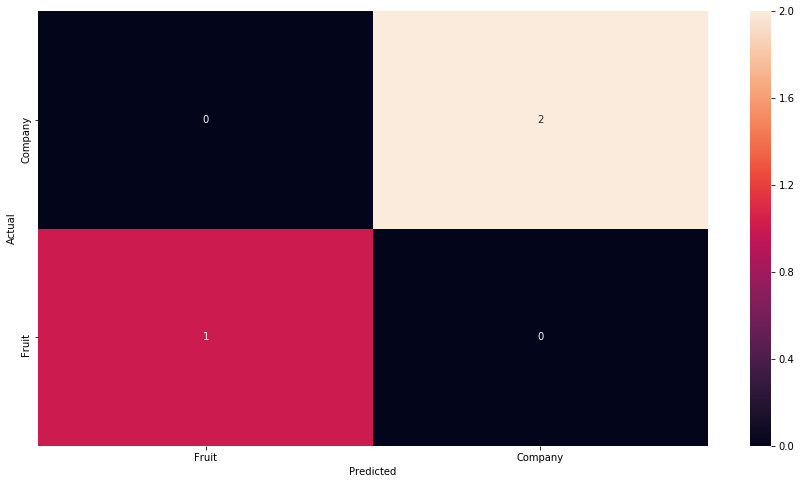

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
conf_mat = confusion_matrix(y_test, predicts)
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=["Fruit", "Company"], yticklabels=["Fruit", "Company"])
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')

## DecisionTreeClassifier

In [111]:
training_data = np.load('DecisionTreeData/training_data.npy')
training_class = np.load('DecisionTreeData/training_class.npy')
test_data = np.load('DecisionTreeData/test_data.npy')
test_class = np.load('DecisionTreeData/test_class.npy')

In [112]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier(criterion='gini', random_state=np.random.RandomState(130))
clf.fit(training_data,training_class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=<mtrand.RandomState object at 0x000002458769B3B8>,
                       splitter='best')

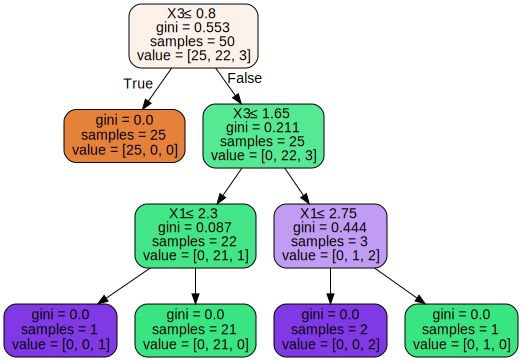

In [121]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data  = export_graphviz(clf.fit(training_data,training_class),  
                   filled=True, rounded=True,  
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2,50,5)},refit='AUC', return_train_score=True)
gs.fit(training_data, training_class)
results = gs.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [159]:
results

{'mean_fit_time': array([0.00103267, 0.        , 0.00033259, 0.0010434 , 0.        ,
        0.00138688, 0.00133459, 0.        , 0.00061878, 0.        ]),
 'std_fit_time': array([0.00085757, 0.        , 0.00047036, 0.00147559, 0.        ,
        0.00196135, 0.00188739, 0.        , 0.00044555, 0.        ]),
 'mean_score_time': array([0.00051522, 0.00033236, 0.        , 0.        , 0.00034483,
        0.        , 0.        , 0.        , 0.00033204, 0.        ]),
 'std_score_time': array([0.0004095 , 0.00047002, 0.        , 0.        , 0.00048767,
        0.        , 0.        , 0.        , 0.00046957, 0.        ]),
 'param_min_samples_split': masked_array(data=[2, 7, 12, 17, 22, 27, 32, 37, 42, 47],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_split': 2},
  {'min_samples_split': 7},
  {'min_samples_split': 12},
  {'min_samples_split': 17},
  {'m

Nous remarquoons dès qu'il depasse le paramètre, le scoring AUC s'affaiblisse, alors pour engendre ce type d'overflitting on doit le stopper à 30-35

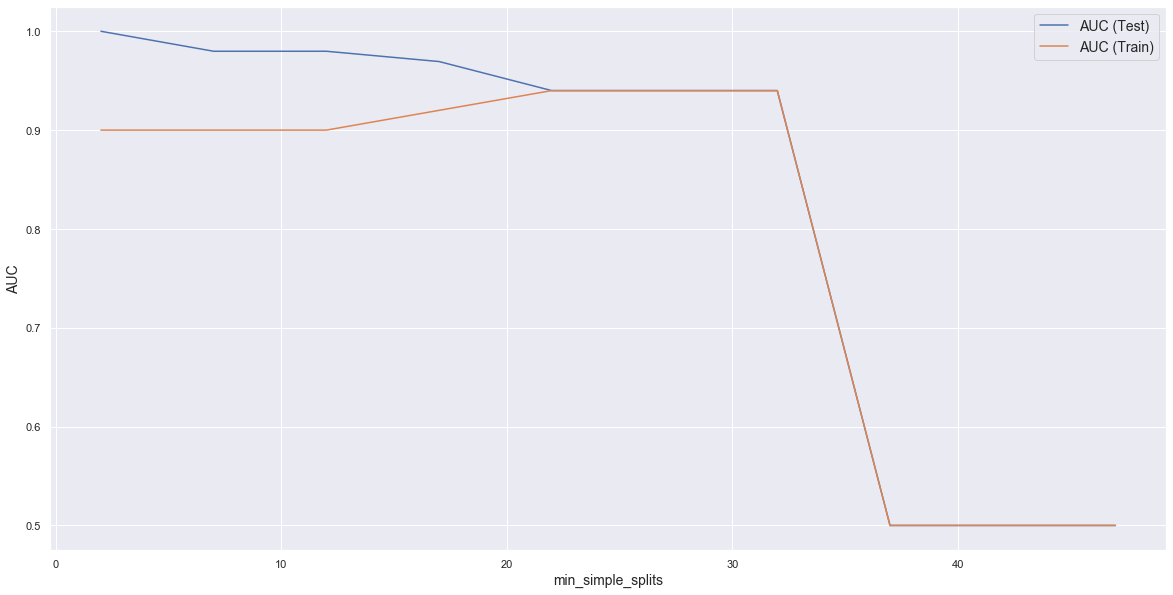

In [164]:
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,10)})
mlviz_3 = sns.lineplot(X_axis,results['mean_train_score'])
sns.lineplot(X_axis,results['mean_test_score'], ax = mlviz_3)
mlviz_3.set_xlabel("min_simple_splits", fontsize = 14)
mlviz_3.set_ylabel("AUC", fontsize = 14)
plt.legend(labels=['AUC (Test)', 'AUC (Train)'],fontsize=14)